In [2]:
import os
import sys
import glob
import pandas as pd
import re

from astropy.io.fits.header import Header

data_folder = "/user/simon/data/soar/header_samples"

file_list = glob.glob(os.path.join(data_folder,
                                   "headers/blue/*blue.txt"))

In [52]:
all_keywords = []
all_dates = []

for _file in sorted(file_list):
    _date = re.sub('-header_blue.txt', '', os.path.basename(_file))
    if _date not in all_dates:
        all_dates.append(_date)
    with open(_file, 'r') as f:
        h = Header.fromtextfile(f)
        for key in h.keys():
            if key not in all_keywords:
                all_keywords.append(key)
all_keywords = all_keywords[::-1]
print(all_keywords)
print(all_dates)


['HEADERVE', 'IMAGEID', 'L1PUBDAT', 'BLKUID', 'RLEVEL', 'TELID', 'SITEID', 'PROPID', 'REQNUM', 'CONFID', 'OBSID', 'LAMP_DPE', 'LAMP_QPE', 'LAMP_DOM', 'LAMP_BUL', 'LAMP_QUA', 'LAMP_CU', 'LAMP_FE', 'LAMP_AR', 'LAMP_NE', 'LAMP_HGA', 'OPENDATE', 'CAMERA', 'INSTSWV', 'CONSWV', 'CAMSWV', 'PG5_0', 'N_PRM5', 'PG4_5', 'PG4_4', 'PG4_3', 'PG4_2', 'PG4_1', 'PG4_0', 'N_PRM4', 'PG3_17', 'PG3_16', 'PG3_15', 'PG3_14', 'PG3_13', 'PG3_12', 'PG3_11', 'PG3_10', 'PG3_9', 'PG3_8', 'PG3_7', 'PG3_6', 'PG3_5', 'PG3_4', 'PG3_3', 'PG3_2', 'PG3_1', 'PG3_0', 'N_PRM3', 'PG2_4', 'PG2_3', 'PG2_2', 'PG2_1', 'PG2_0', 'N_PRM2', 'PG1_35', 'PG1_34', 'PG1_33', 'PG1_32', 'PG1_31', 'PG1_30', 'PG1_29', 'PG1_28', 'PG1_27', 'PG1_26', 'PG1_25', 'PG1_24', 'PG1_23', 'PG1_22', 'PG1_21', 'PG1_20', 'PG1_19', 'PG1_18', 'PG1_17', 'PG1_16', 'PG1_15', 'PG1_14', 'PG1_13', 'PG1_12', 'PG1_11', 'PG1_10', 'PG1_9', 'PG1_8', 'PG1_7', 'PG1_6', 'PG1_5', 'PG1_4', 'PG1_3', 'PG1_2', 'PG1_1', 'PG1_0', 'N_PRM1', 'PG0_4', 'PG0_3', 'PG0_2', 'PG0_1', 'PG

In [53]:
df = pd.DataFrame(columns=all_keywords, index=all_dates)
# df.insert(0, 'dates', all_dates, True)
df = df.fillna(False)
print(df)
for _file in sorted(file_list):
    _date = re.sub('-header_blue.txt', '', os.path.basename(_file))
    with open(_file, 'r') as f:
        h = Header.fromtextfile(f)
        for key in h.keys():
            df.at[_date, key] = True
print(df.to_string())
print(df.all().to_string())
# print(df[~df.all()].to_string())

            HEADERVE  IMAGEID  L1PUBDAT  BLKUID  RLEVEL  TELID  SITEID  \
1996-02-17     False    False     False   False   False  False   False   
1996-02-20     False    False     False   False   False  False   False   
1996-02-21     False    False     False   False   False  False   False   
1996-03-01     False    False     False   False   False  False   False   
2013-12-28     False    False     False   False   False  False   False   
2013-12-31     False    False     False   False   False  False   False   
2014-01-03     False    False     False   False   False  False   False   
2014-01-04     False    False     False   False   False  False   False   
2014-01-06     False    False     False   False   False  False   False   
2014-01-07     False    False     False   False   False  False   False   
2014-01-09     False    False     False   False   False  False   False   
2014-01-10     False    False     False   False   False  False   False   
2014-01-11     False    False     Fals

            HEADERVE  IMAGEID  L1PUBDAT  BLKUID  RLEVEL  TELID  SITEID  PROPID  REQNUM  CONFID  OBSID  LAMP_DPE  LAMP_QPE  LAMP_DOM  LAMP_BUL  LAMP_QUA  LAMP_CU  LAMP_FE  LAMP_AR  LAMP_NE  LAMP_HGA  OPENDATE  CAMERA  INSTSWV  CONSWV  CAMSWV  PG5_0  N_PRM5  PG4_5  PG4_4  PG4_3  PG4_2  PG4_1  PG4_0  N_PRM4  PG3_17  PG3_16  PG3_15  PG3_14  PG3_13  PG3_12  PG3_11  PG3_10  PG3_9  PG3_8  PG3_7  PG3_6  PG3_5  PG3_4  PG3_3  PG3_2  PG3_1  PG3_0  N_PRM3  PG2_4  PG2_3  PG2_2  PG2_1  PG2_0  N_PRM2  PG1_35  PG1_34  PG1_33  PG1_32  PG1_31  PG1_30  PG1_29  PG1_28  PG1_27  PG1_26  PG1_25  PG1_24  PG1_23  PG1_22  PG1_21  PG1_20  PG1_19  PG1_18  PG1_17  PG1_16  PG1_15  PG1_14  PG1_13  PG1_12  PG1_11  PG1_10  PG1_9  PG1_8  PG1_7  PG1_6  PG1_5  PG1_4  PG1_3  PG1_2  PG1_1  PG1_0  N_PRM1  PG0_4  PG0_3  PG0_2  PG0_1  PG0_0  N_PRM0    ROI  WAVMODE  INSTCONF  COMMENT  CLOSETIM  OPENTIME  CCDSUM  CCDSIZE  TRIMSEC  DETSIZE  DISPAXIS  ENVHUM  ENVTEM  ENVDIR  ENVPRE  ENVWIN  EQUINOX  PROPOSAL  OBSERVER  OBSTYPE  G

In [54]:
for column in all_keywords:
    if df[column].all():
        df = df.drop(columns=[column])

In [55]:
pd.set_option('display.max_rows', len(df))
df

,HEADERVE,IMAGEID,L1PUBDAT,BLKUID,RLEVEL,TELID,SITEID,PROPID,REQNUM,CONFID,...,PARAM7,PARAM6,PARAM5,PARAM4,PARAM3,PARAM2,PARAM1,PARAM0,N_PARAM,NAXIS3
1996-02-17,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1996-02-20,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1996-02-21,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1996-03-01,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2013-12-28,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2013-12-31,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2014-01-03,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2014-01-04,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2014-01-06,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2014-01-07,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


In [57]:
filtered_keys = list(df.columns)

for key in filtered_keys:
    print(" ")
    previous_state=None
    for index, row in df.iterrows():
        if previous_state is None:
            previous_state=row[key]
        elif row[key] != previous_state :
            print(f"{key} changed from {previous_state} to {row[key]} {index}")
            previous_state=row[key]

 
HEADERVE changed from False to True 2019-10-21
 
IMAGEID changed from False to True 2019-10-21
 
L1PUBDAT changed from False to True 2019-10-21
 
BLKUID changed from False to True 2019-10-21
 
RLEVEL changed from False to True 2019-10-21
 
TELID changed from False to True 2019-10-21
 
SITEID changed from False to True 2019-10-21
 
PROPID changed from False to True 2019-10-21
 
REQNUM changed from False to True 2019-10-21
 
CONFID changed from False to True 2019-10-21
 
OBSID changed from False to True 2019-10-21
 
LAMP_DPE changed from False to True 2018-09-01
 
LAMP_QPE changed from False to True 2018-09-01
 
LAMP_DOM changed from False to True 2018-04-12
 
LAMP_BUL changed from False to True 2018-04-12
 
LAMP_QUA changed from False to True 2018-04-12
 
LAMP_CU changed from False to True 2018-04-12
 
LAMP_FE changed from False to True 2018-04-12
 
LAMP_AR changed from False to True 2018-04-12
 
LAMP_NE changed from False to True 2018-04-12
 
LAMP_HGA changed from False to True 2018-

PG1_19 changed from False to True 2017-05-09
 
PG1_18 changed from False to True 2017-05-09
 
PG1_17 changed from False to True 2017-05-09
 
PG1_16 changed from False to True 2017-05-09
 
PG1_15 changed from False to True 2017-05-09
 
PG1_14 changed from False to True 2017-05-09
 
PG1_13 changed from False to True 2017-05-09
 
PG1_12 changed from False to True 2017-05-09
 
PG1_11 changed from False to True 2017-05-09
 
PG1_10 changed from False to True 2017-05-09
 
PG1_9 changed from False to True 2017-05-09
 
PG1_8 changed from False to True 2017-05-09
 
PG1_7 changed from False to True 2017-05-09
 
PG1_6 changed from False to True 2017-05-09
 
PG1_5 changed from False to True 2017-05-09
 
PG1_4 changed from False to True 2017-05-09
 
PG1_3 changed from False to True 2017-05-09
 
PG1_2 changed from False to True 2017-05-09
 
PG1_1 changed from False to True 2017-05-09
 
PG1_0 changed from False to True 2017-05-09
 
N_PRM1 changed from False to True 2017-05-09
 
PG0_4 changed from Fals

ENVDIR changed from False to True 2014-08-05
ENVDIR changed from True to False 2014-08-06
ENVDIR changed from False to True 2014-08-26
 
ENVPRE changed from True to False 2013-12-28
ENVPRE changed from False to True 2014-08-05
ENVPRE changed from True to False 2014-08-06
ENVPRE changed from False to True 2014-08-26
 
ENVWIN changed from True to False 2013-12-28
ENVWIN changed from False to True 2014-08-05
ENVWIN changed from True to False 2014-08-06
ENVWIN changed from False to True 2014-08-26
 
ADCPOS changed from True to False 2013-12-28
ADCPOS changed from False to True 2014-09-09
 
ADCSTAT changed from True to False 2013-12-28
ADCSTAT changed from False to True 2014-08-05
ADCSTAT changed from True to False 2014-08-06
ADCSTAT changed from False to True 2014-08-26
 
HA changed from True to False 2013-12-28
HA changed from False to True 2014-08-05
HA changed from True to False 2014-08-06
HA changed from False to True 2014-08-26
 
DOME_AZ changed from True to False 2013-12-28
DOME_AZ c

In [9]:
ar = df.to_numpy()

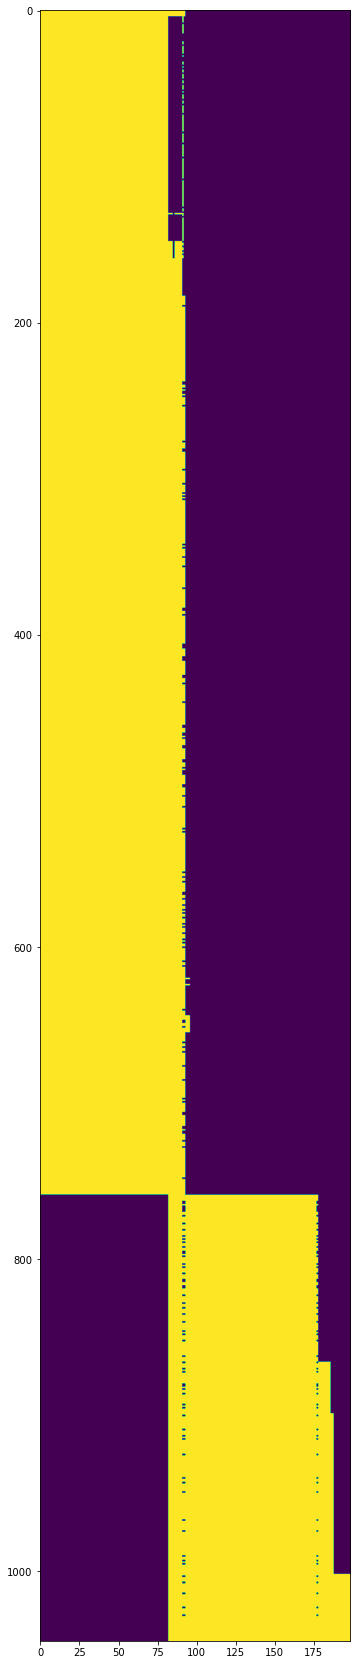

In [18]:
import matplotlib.pyplot as plt
fig , ax = plt.subplots(figsize=(40, 30))
ax.imshow(ar, interpolation=None)
plt.savefig('./test.png')